In [1]:
# Vanilla imports
import numpy as np
import matplotlib.pyplot as plt

# Chocolate imports
from src.Luminosity.photosphere import get_photosphere
from src.Optical_Depth.opacity_table import opacity

# Constants
c = 2.99792458e10 #[cm/s]
h = 6.62607015e-27 #[gcm^2/s]
Kb = 1.380649e-16 #[gcm^2/s^2K]
alpha = 7.5646 * 10**(-15) # radiation density [erg/cm^3K^4]
Rsol_to_cm = 6.957e10

In [2]:
def log_array(n_min, n_max, lenght):
    x_min = np.log10(n_min)
    x_max = np.log10(n_max)
    x_arr = np.linspace(x_min, x_max , num = lenght)
    return x_arr

In [13]:
def planck(Temperature: float, n: float) -> float:
    """ Planck function in a cell. It needs temperature and frequency. """
    const = 2*h / c**2
    fun = const * n**3 / (np.exp(h*n/(Kb*Temperature))-1)
    return fun

def luminosity_n(Temperature: float, Density: float, tau: float, volume: float, n:int):
    """ Luminosity in a cell: L_ni = \epsilon e^(-\tau) B_ni / B where  
    B = \sigma T^4/\pi"""
    k_planck = opacity(Temperature, Density, 'planck', ln = False)
    pp = planck(Temperature, n)
    if pp == 0:
        print('planck=0 in n = ', n)
    if k_planck == 0:
        print('K=0 in n = ', n)
    if volume == 0:
        print('volume = 0 in n = ', n)
    # if np.exp(-tau) == 0:
    #     print('tau: ', tau)
    if tau == 0:
        print('tau = 0 in n = ', n)
    # print(pp)
    Lum = 4  * np.pi * k_planck * volume * np.exp(-tau) * pp
    return Lum

In [9]:
m = 6
fix = 844   
n_min = 1e12
n_max = 1e16
n_spacing = 10000
x_arr = log_array(n_min, n_max, n_spacing)
n_arr = 10**x_arr

In [8]:
# Get Photosphere
rays_T, rays_den, rays_tau, photosphere, radii = get_photosphere(fix, m)
dr = (radii[1] - radii[0])
volume = 4 * np.pi * radii**2 * dr  / 192

set big opacity


Ray  111 counted 1 temp [25376.005885166775]
[0. 0. 0. ... 0. 0. 0.]


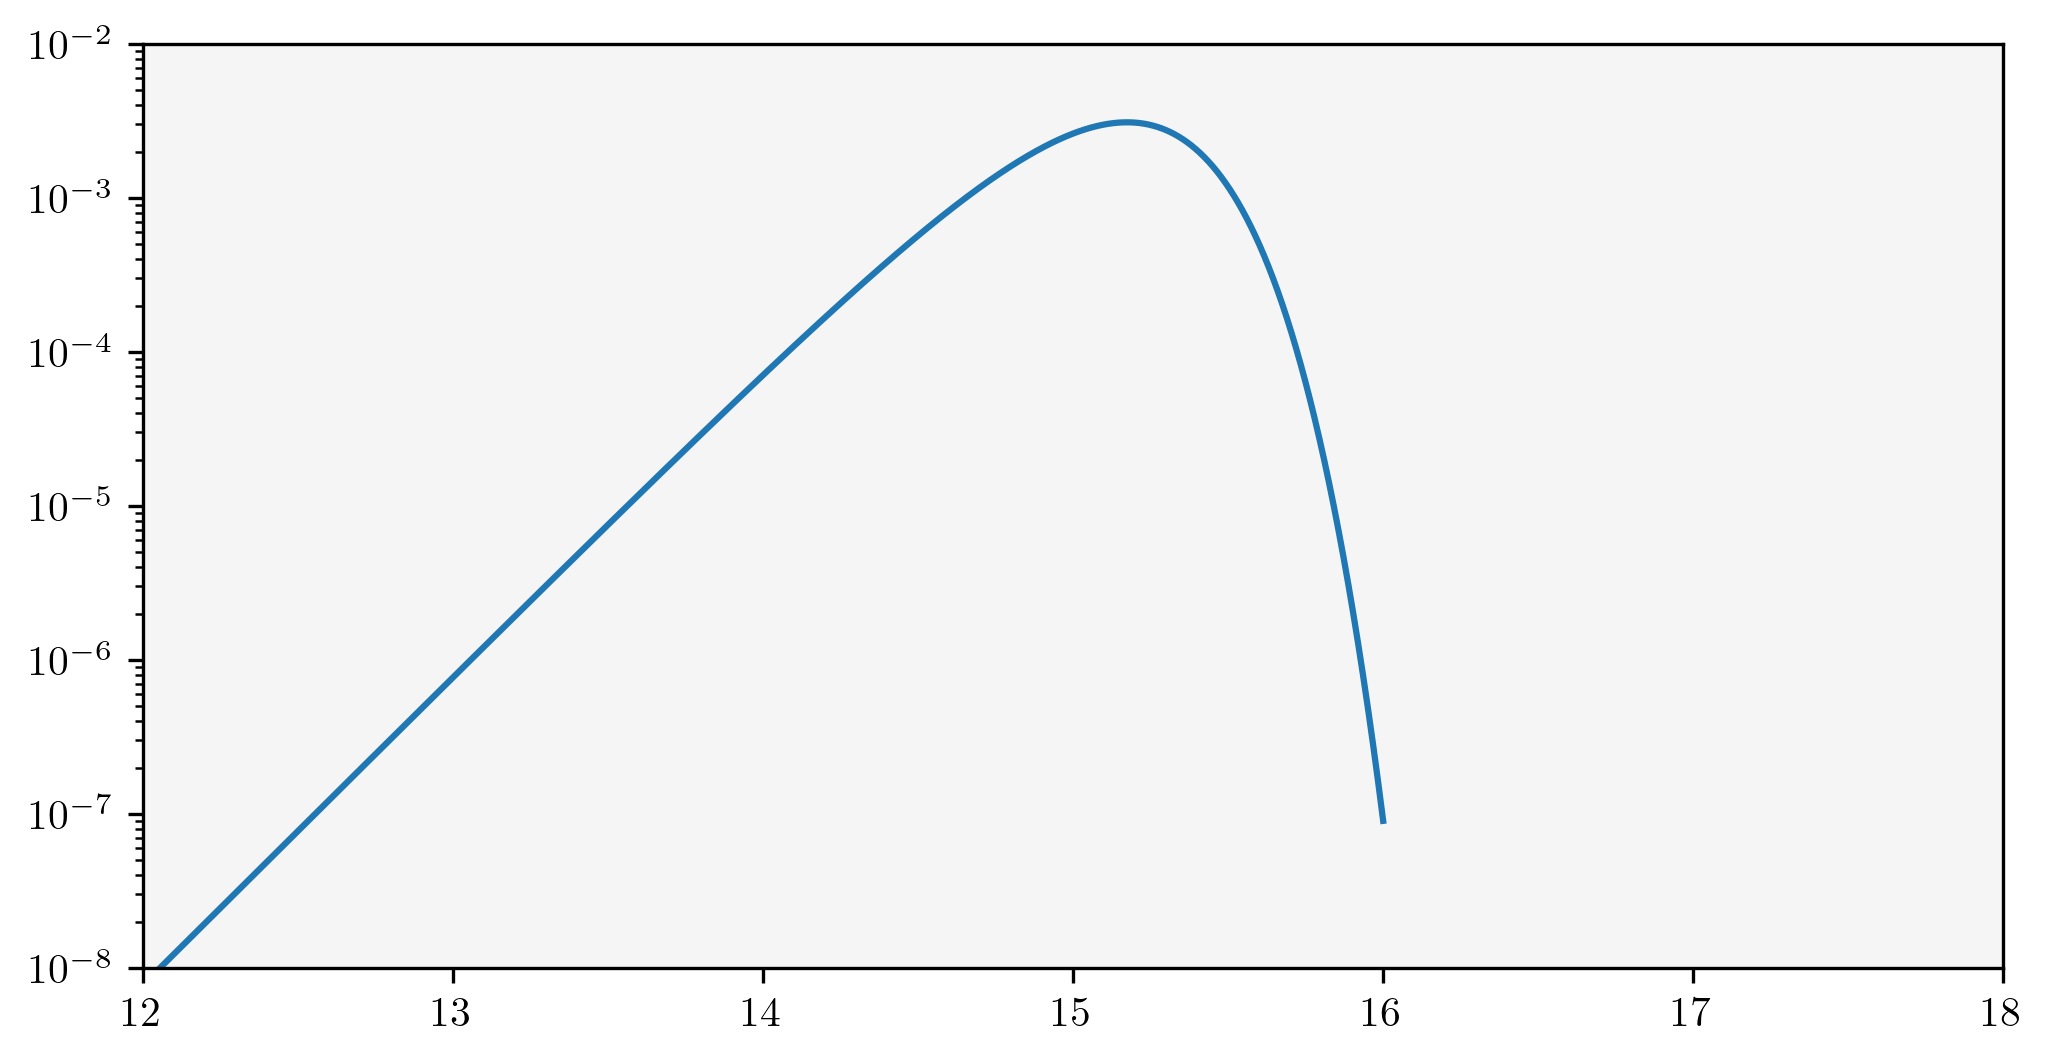

In [14]:
lum_n = np.zeros(len(x_arr))

j = 111
counter_inf = 0
counter_up = 0
counter = 0
temps = []
#for j in range(192):
for i in range(len(rays_tau[j])): 
    reverse_idx = -i -1
    Temp = rays_T[j][reverse_idx]
    rho = rays_den[j][reverse_idx] 
    opt_depth = rays_tau[j][i]
    cell_vol = volume[reverse_idx]
    freq = 10**x_arr

    # Ensure we can interpolate
    rho_low = np.exp(-22)
    T_low = np.exp(8.77)
    T_high = np.exp(17.8)
    if rho == 0  or Temp < T_low:
        counter_inf += 1
        # if rho == 0:
        #     print('Rho precisely 0')
        # elif Temp < T_low:
        #     print('Temp too low in BB')
        continue
    if Temp > T_high:
        counter_up += 1
        Temp = np.exp(17.7)         
    
    counter += 1
    temps.append(Temp)
    for n_index in range(len(n_arr)): #we need linearspace
        lum_n_cell = luminosity_n(Temp, rho, opt_depth, cell_vol, n_arr[n_index])
        #print(lum_n_cell)
        lum_n[n_index] += lum_n_cell
    plt.figure(figsize=(8,4))
    plt.plot(x_arr,planck(Temp, n_arr))
    plt.yscale('log')
    plt.ylim(1e-8,1e-2)
    plt.xlim(12,18)
print('Ray ', j, 'counted', counter, 'temp', temps)
#print('too low: ', counter_inf)
#print('too high: ', counter_up) 
print(lum_n)
        